Import Packages

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the Data

In [20]:
parent_dir = '../../data/ping_pong/'

NMSG = 2_000_000_000
ITERATIONS = 15
# Load Scala benchmark data
scala_idle_raw_data = pd.read_csv(f'{parent_dir}11/ping_pong_akka_actor_benchmark_idle_power.csv')
scala_bench_raw_data = pd.read_csv(f'{parent_dir}11/ping_pong_akka_actor_benchmark_power_metrics.csv')

# Load Erlang benchmark data
erlang_idle_raw_data = pd.read_csv(f'{parent_dir}11/ping_pong_benchmark_idle_power.csv')
erlang_bench_raw_data = pd.read_csv(f'{parent_dir}11/ping_pong_benchmark_power_metrics.csv')

# Replace empty or missing values with "N/A" in non-numeric columns
scala_idle_raw_data.fillna("N/A", inplace=True)
scala_bench_raw_data.fillna("N/A", inplace=True)
erlang_idle_raw_data.fillna("N/A", inplace=True)
erlang_bench_raw_data.fillna("N/A", inplace=True)

Preview the Data

In [21]:
print("Scala Idle Raw Data:")
print(scala_idle_raw_data.shape)
scala_idle_raw_data.head()

Scala Idle Raw Data:
(10, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Wed Mar 19 19:48:52 2025 +0100) (508.23ms ela...,6.77,0.1360,1.170,8.54,1.41,68.22,60.58 C,Nominal
1,(Wed Mar 19 19:48:53 2025 +0100) (504.73ms ela...,16.50,0.1110,1.420,18.41,1.86,86.78,60.30 C,Nominal
2,(Wed Mar 19 19:48:53 2025 +0100) (504.68ms ela...,11.40,0.1390,1.040,13.57,1.83,75.16,60.30 C,Nominal
3,(Wed Mar 19 19:48:54 2025 +0100) (508.08ms ela...,1.74,0.0597,0.809,2.69,1.16,56.62,60.00 C,Nominal
4,(Wed Mar 19 19:48:54 2025 +0100) (508.11ms ela...,2.66,0.0000,0.730,3.53,1.08,58.74,60.00 C,Nominal


In [22]:
print("Scala Benchmark Raw Data:")
print(scala_bench_raw_data.shape)
scala_bench_raw_data.head()

Scala Benchmark Raw Data:
(39113, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Wed Mar 19 19:49:04 2025 +0100) (1007.22ms el...,34.5,0.1000,1.120,36.82,3.74,97.46,59.77 C,Nominal
1,(Wed Mar 19 19:49:05 2025 +0100) (1004.21ms el...,34.4,0.0231,0.678,36.93,3.81,99.32,64.34 C,Nominal
2,(Wed Mar 19 19:49:06 2025 +0100) (1005.78ms el...,34.3,0.0269,0.545,36.51,3.80,99.49,67.66 C,Nominal
3,(Wed Mar 19 19:49:07 2025 +0100) (1005.37ms el...,34.3,0.0000,0.517,36.33,3.80,99.38,70.20 C,Nominal
4,(Wed Mar 19 19:49:08 2025 +0100) (1004.38ms el...,35.6,0.0000,0.545,37.82,3.82,98.52,72.14 C,Nominal


In [23]:
print("Erlang Idle Raw Data:")
print(erlang_idle_raw_data.shape)
erlang_idle_raw_data.head()

Erlang Idle Raw Data:
(10, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Thu Mar 20 20:03:32 2025 +0100) (510.82ms ela...,10.700,0.0692,1.160,11.66,1.52,64.37,44.34 C,Nominal
1,(Thu Mar 20 20:03:32 2025 +0100) (506.59ms ela...,12.500,0.0572,0.972,13.42,1.58,70.49,45.48 C,Nominal
2,(Thu Mar 20 20:03:33 2025 +0100) (507.49ms ela...,1.030,0.1010,0.844,1.84,0.65,30.57,45.48 C,Nominal
3,(Thu Mar 20 20:03:33 2025 +0100) (508.68ms ela...,0.564,0.0389,0.640,1.13,0.42,21.89,45.45 C,Nominal
4,(Thu Mar 20 20:03:34 2025 +0100) (509.18ms ela...,0.228,0.0000,0.288,0.47,0.16,11.12,45.45 C,Nominal


In [6]:
print("Erlang Benchmark Raw Data:")
print(erlang_bench_raw_data.shape)
erlang_bench_raw_data.head()

Erlang Benchmark Raw Data:
(24439, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Thu Mar 20 20:03:43 2025 +0100) (1012.03ms el...,18.2,0.1040,0.922,19.17,1.79,96.48,49.55 C,Nominal
1,(Thu Mar 20 20:03:44 2025 +0100) (1007.03ms el...,13.8,0.0320,0.409,14.40,1.19,97.71,52.22 C,Nominal
2,(Thu Mar 20 20:03:45 2025 +0100) (1008.02ms el...,12.6,0.0261,0.294,13.16,1.02,98.86,55.04 C,Nominal
3,(Thu Mar 20 20:03:46 2025 +0100) (1006.79ms el...,12.6,0.0000,0.260,13.08,1.01,99.30,57.39 C,Nominal
4,(Thu Mar 20 20:03:47 2025 +0100) (1007.73ms el...,14.5,0.0000,0.328,15.03,1.26,98.64,59.04 C,Nominal


Clean the Data

In [24]:
def clean_data(df):
    df_copy = df.copy() 
    
    # Convert Timestamp to datetime format (extract date-time pattern)
    df_copy['Timestamp'] = pd.to_datetime(
        df['Timestamp'].str.extract(r'(\w{3} \w{3} \d{1,2} \d{2}:\d{2}:\d{2} \d{4})')[0], 
        errors='coerce'
    )

    # Extract elapsed time in milliseconds
    df_copy['Time Elapsed (ms)'] = pd.to_numeric(
        df['Timestamp'].str.extract(r'\((\d+\.\d+)ms elapsed\)')[0], 
        errors='coerce'
    )
    
    # Extract numeric temperature values
    df_copy['CPU Temp(C)'] = df['CPU Temp(C)'].str.extract(r'(\d+\.\d+|\d+)').astype(float)

    # Fill N/A values with 0 for numerical columns
    df_copy = df_copy.fillna(0)
    
    return df_copy

In [25]:
scala_idle_data = clean_data(scala_idle_raw_data)
scala_bench_data = clean_data(scala_bench_raw_data)
erlang_idle_data = clean_data(erlang_idle_raw_data)
erlang_bench_data = clean_data(erlang_bench_raw_data)

Verify Cleaned Data

In [26]:
print("Scala Idle Clean Data:")
print(scala_idle_data.shape)
scala_idle_data.head()

Scala Idle Clean Data:
(10, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-03-19 19:48:52,6.77,0.1360,1.170,8.54,1.41,68.22,60.58,Nominal,508.23
1,2025-03-19 19:48:53,16.50,0.1110,1.420,18.41,1.86,86.78,60.30,Nominal,504.73
2,2025-03-19 19:48:53,11.40,0.1390,1.040,13.57,1.83,75.16,60.30,Nominal,504.68
3,2025-03-19 19:48:54,1.74,0.0597,0.809,2.69,1.16,56.62,60.00,Nominal,508.08
4,2025-03-19 19:48:54,2.66,0.0000,0.730,3.53,1.08,58.74,60.00,Nominal,508.11


In [27]:
print("Scala Benchmark Clean Data:")
print(scala_bench_data.shape)
scala_bench_data.head()


Scala Benchmark Clean Data:
(39113, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-03-19 19:49:04,34.5,0.1000,1.120,36.82,3.74,97.46,59.77,Nominal,1007.22
1,2025-03-19 19:49:05,34.4,0.0231,0.678,36.93,3.81,99.32,64.34,Nominal,1004.21
2,2025-03-19 19:49:06,34.3,0.0269,0.545,36.51,3.80,99.49,67.66,Nominal,1005.78
3,2025-03-19 19:49:07,34.3,0.0000,0.517,36.33,3.80,99.38,70.20,Nominal,1005.37
4,2025-03-19 19:49:08,35.6,0.0000,0.545,37.82,3.82,98.52,72.14,Nominal,1004.38


In [28]:
print("Erlang Idle Clean Data:")
print(erlang_idle_data.shape)
erlang_idle_data.head()


Erlang Idle Clean Data:
(10, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-03-20 20:03:32,10.700,0.0692,1.160,11.66,1.52,64.37,44.34,Nominal,510.82
1,2025-03-20 20:03:32,12.500,0.0572,0.972,13.42,1.58,70.49,45.48,Nominal,506.59
2,2025-03-20 20:03:33,1.030,0.1010,0.844,1.84,0.65,30.57,45.48,Nominal,507.49
3,2025-03-20 20:03:33,0.564,0.0389,0.640,1.13,0.42,21.89,45.45,Nominal,508.68
4,2025-03-20 20:03:34,0.228,0.0000,0.288,0.47,0.16,11.12,45.45,Nominal,509.18


In [29]:
print("Erlang Benchmark Clean Data:")
print(erlang_bench_data.shape)
erlang_bench_data.head()

Erlang Benchmark Clean Data:
(24439, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-03-20 20:03:43,18.2,0.1040,0.922,19.17,1.79,96.48,49.55,Nominal,1012.03
1,2025-03-20 20:03:44,13.8,0.0320,0.409,14.40,1.19,97.71,52.22,Nominal,1007.03
2,2025-03-20 20:03:45,12.6,0.0261,0.294,13.16,1.02,98.86,55.04,Nominal,1008.02
3,2025-03-20 20:03:46,12.6,0.0000,0.260,13.08,1.01,99.30,57.39,Nominal,1006.79
4,2025-03-20 20:03:47,14.5,0.0000,0.328,15.03,1.26,98.64,59.04,Nominal,1007.73


Visualize the Data

In [30]:
def plot_graphs(idle_df, bench_df, title_prefix):
    """
    Creates side-by-side subplots for each metric, plotting idle (left) and benchmark (right),
    using elapsed time on the x-axis.
    """
    columns_to_plot = [
        "CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", 
        "(CPUs+GT+SA) Power(W)", "Avg Num Cores Active", "CPU Temp(C)"
    ]

    sns.set_theme(style="whitegrid", palette="muted")

    # Create a copy of the dataframes to avoid modifying the original data
    idle_df = idle_df.copy()
    bench_df = bench_df.copy()
    
    # idle_df["Elapsed Time (s)"] = (idle_df["Timestamp"] - idle_df["Timestamp"].iloc[0]).dt.total_seconds()
    # bench_df["Elapsed Time (s)"] = (bench_df["Timestamp"] - bench_df["Timestamp"].iloc[0]).dt.total_seconds()

    # Compute elapsed time starting from t=0
    idle_df["Elapsed Time (s)"] = (idle_df["Time Elapsed (ms)"].cumsum() - idle_df["Time Elapsed (ms)"].iloc[0]) / 1000
    bench_df["Elapsed Time (s)"] = (bench_df["Time Elapsed (ms)"].cumsum() - bench_df["Time Elapsed (ms)"].iloc[0]) / 1000

    for column in columns_to_plot:
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))

        # Plot Idle data on the first subplot
        sns.lineplot(data=idle_df, x="Elapsed Time (s)", y=column, label="Idle", color='blue', linestyle='--', ax=axes[0])
        axes[0].set_title(f"Idle - {column}", fontsize=12)
        axes[0].set_xlabel("Elapsed Time (s)", fontsize=10)
        axes[0].set_ylabel(column, fontsize=10)
        axes[0].legend()
        axes[0].grid(True)

        # Plot Benchmark data on the second subplot
        sns.lineplot(data=bench_df, x="Elapsed Time (s)", y=column, label="Benchmark", color='red', ax=axes[1])
        axes[1].set_title(f"Benchmark - {column}", fontsize=12)
        axes[1].set_xlabel("Elapsed Time (s)", fontsize=10)
        axes[1].set_ylabel(column, fontsize=10)
        axes[1].legend()
        axes[1].grid(True)

        # Main figure title
        fig.suptitle(f"{title_prefix} - {column}", fontsize=14)
        
        # Adjust layout to avoid overlap
        plt.tight_layout(rect=[0, 0, 1, 0.95]) 
        plt.show()


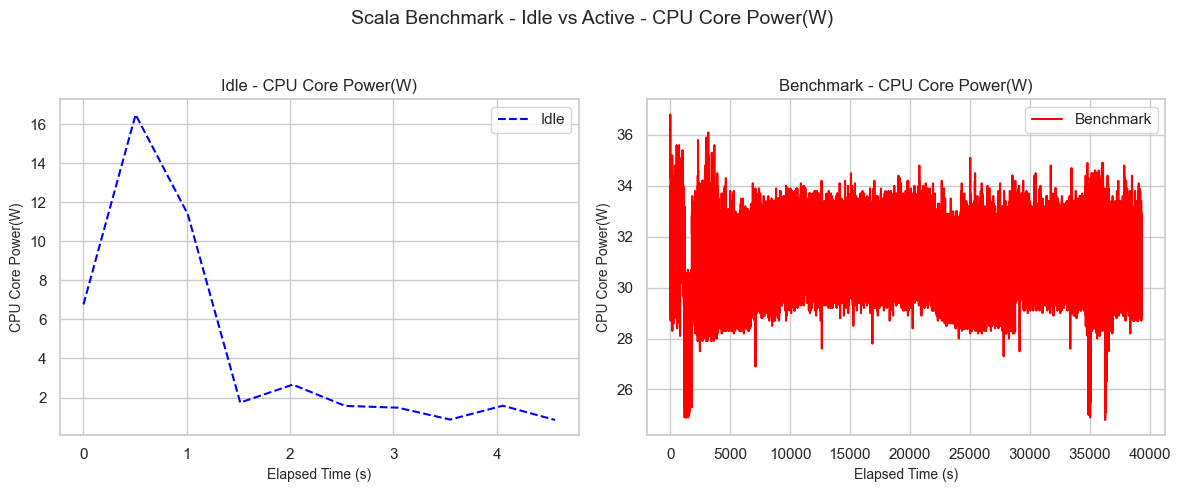

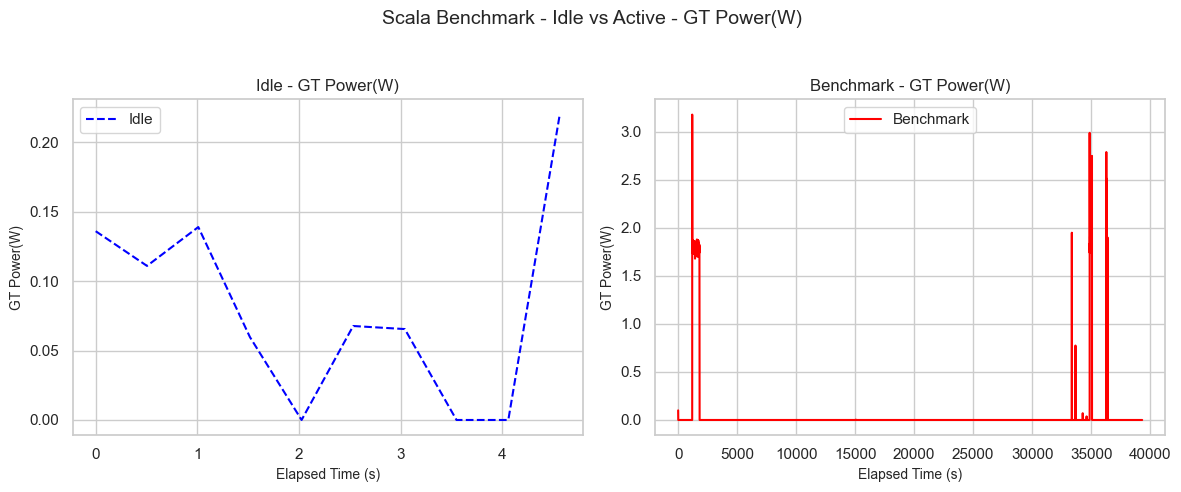

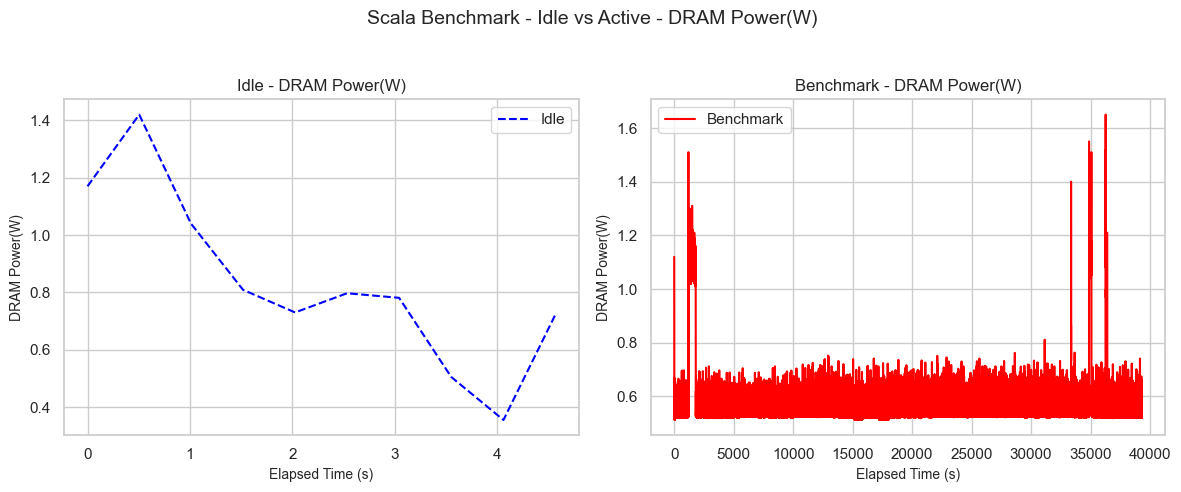

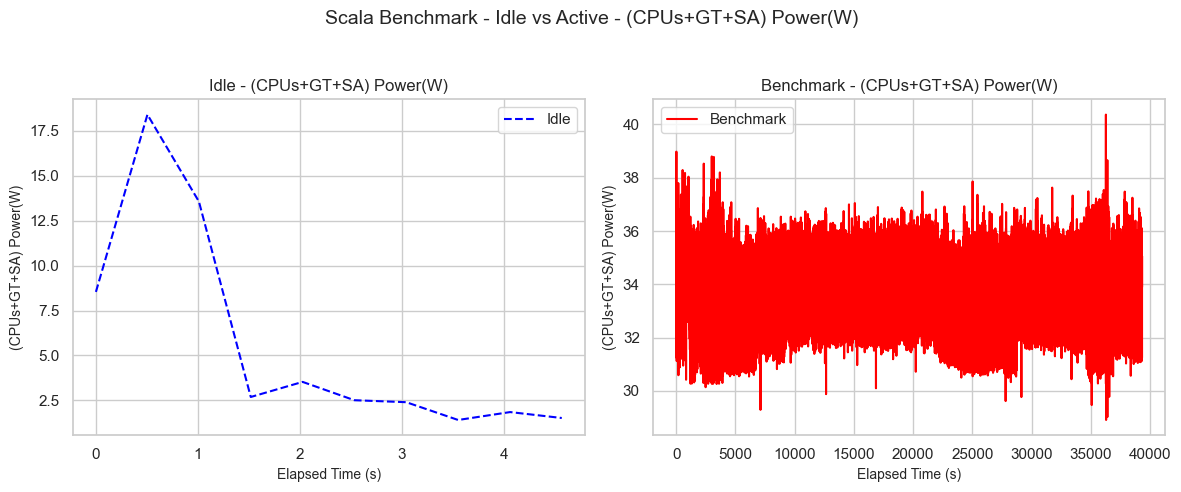

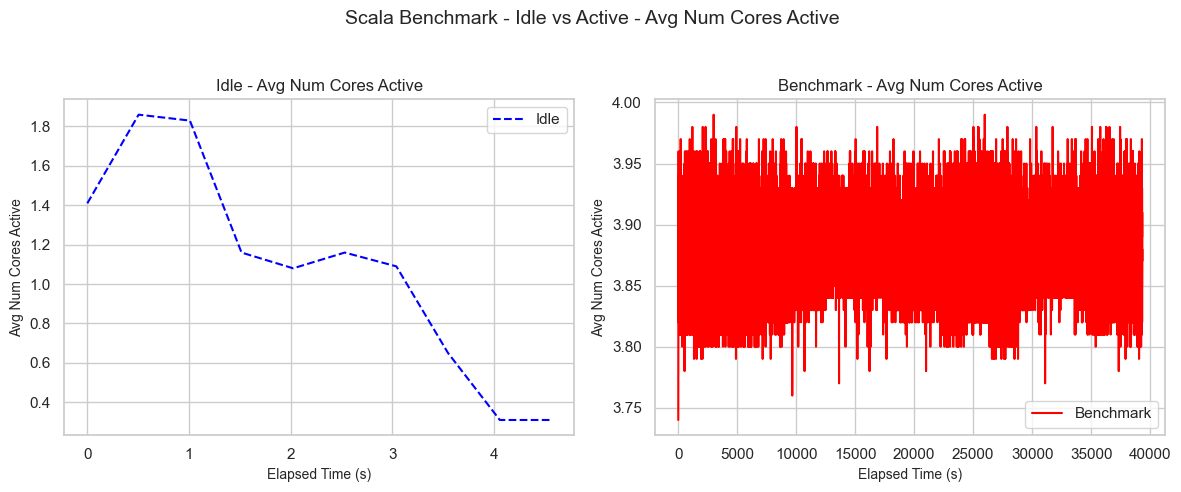

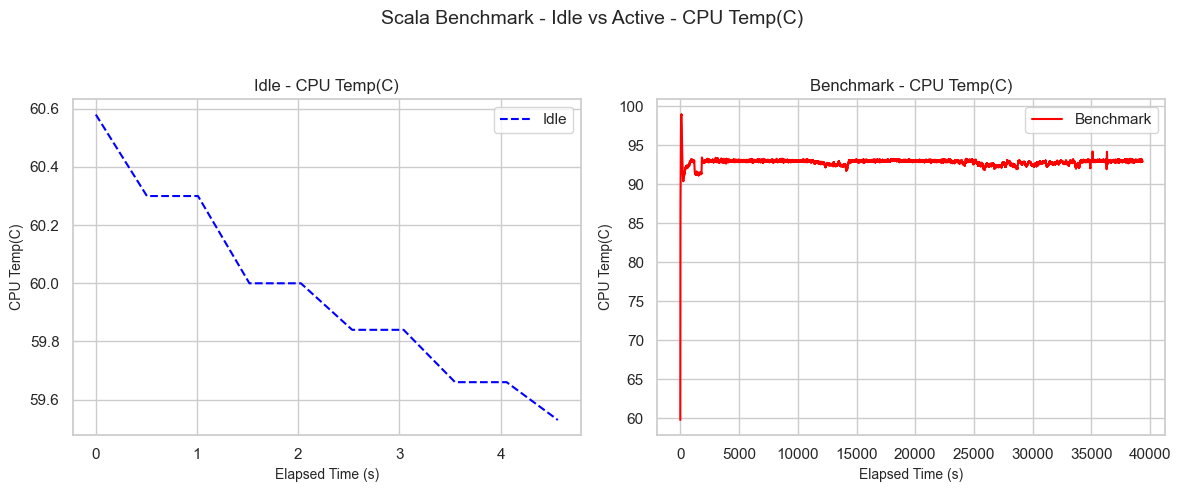

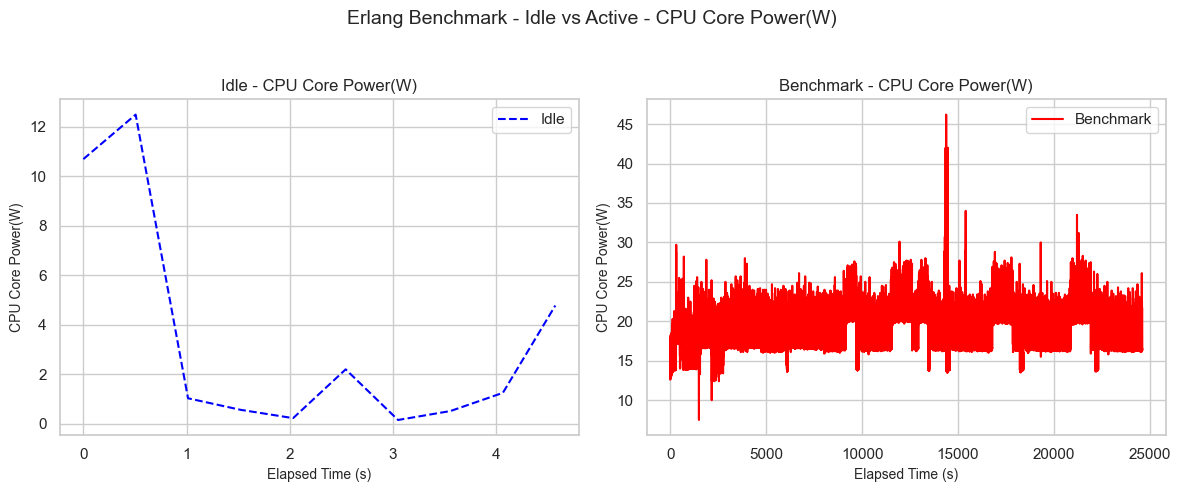

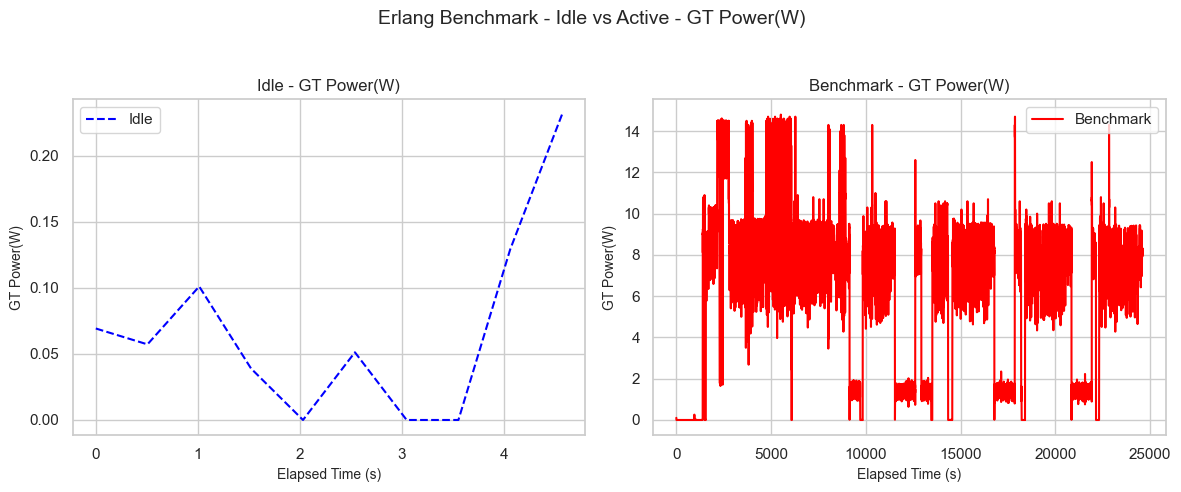

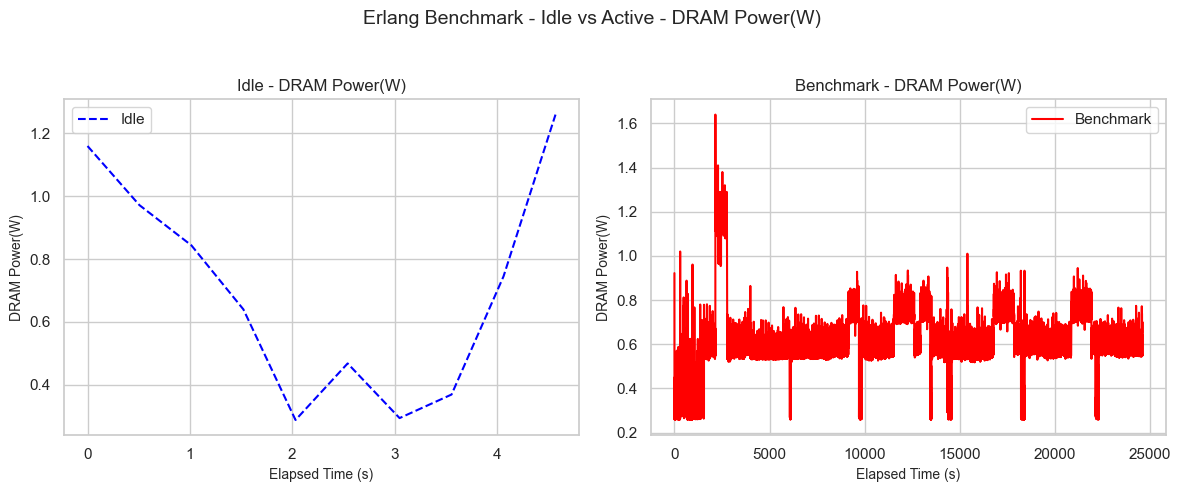

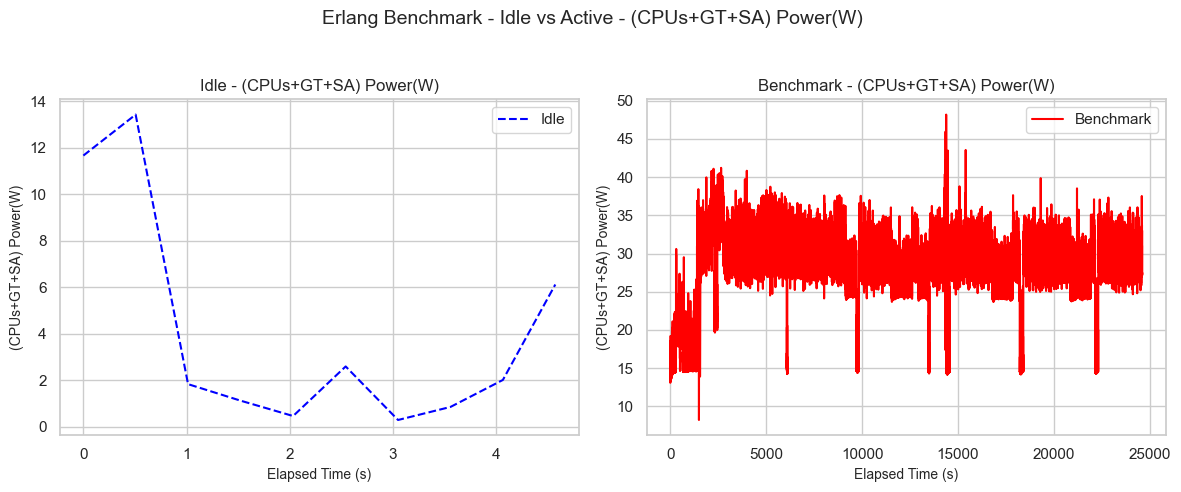

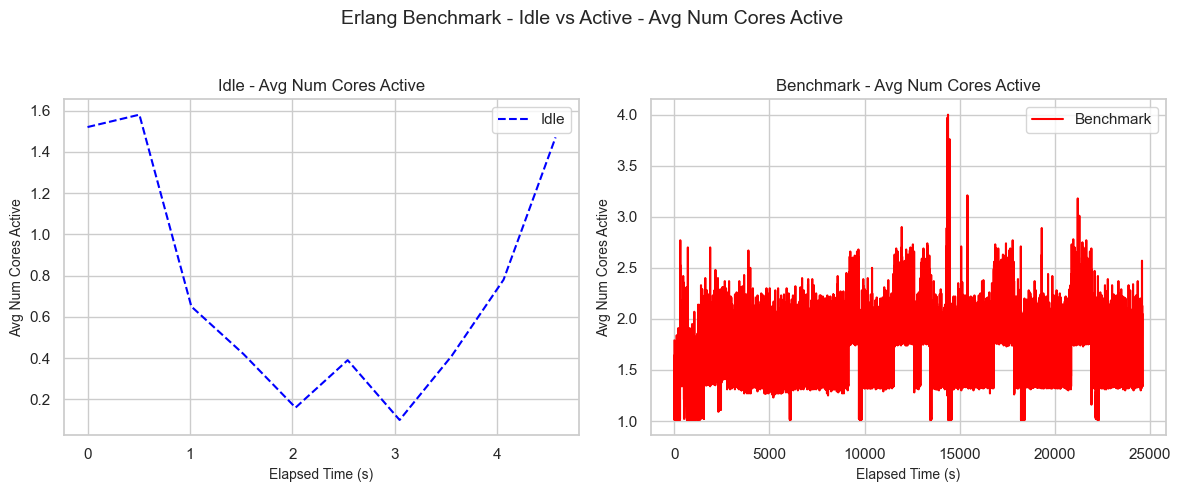

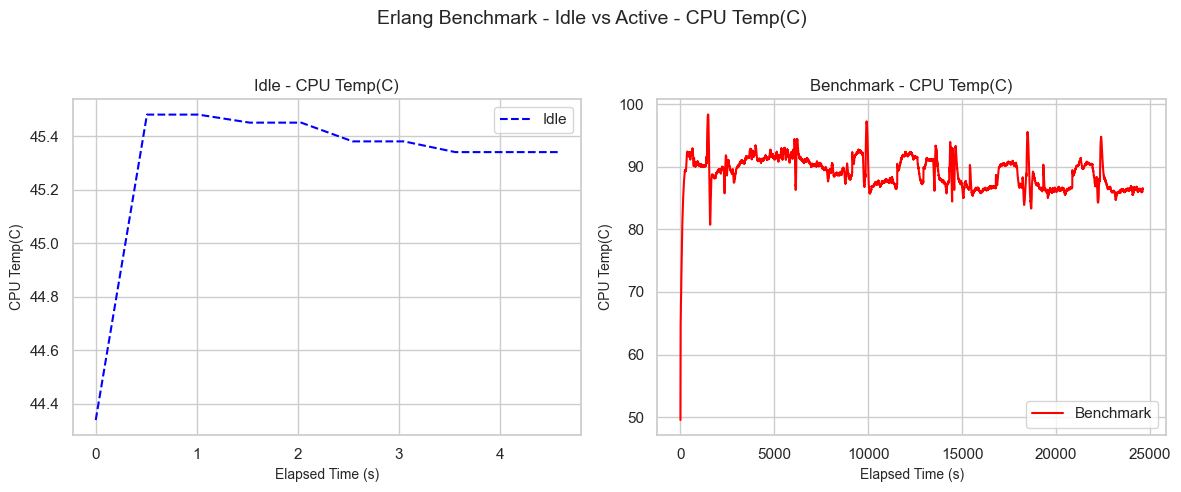

In [31]:
plot_graphs(scala_idle_data, scala_bench_data, "Scala Benchmark - Idle vs Active")
plot_graphs(erlang_idle_data, erlang_bench_data, "Erlang Benchmark - Idle vs Active")

In [32]:
def plot_erlang_vs_scala(erlang_df, scala_df, idle_erlang_df, idle_scala_df, title_prefix):
    """
    Plots Erlang and Scala benchmark data with elapsed time starting at t=0,
    after subtracting corresponding idle values.
    """
    columns_to_plot = [
        "CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", 
        "(CPUs+GT+SA) Power(W)", "Avg Num Cores Active", "CPU Temp(C)"
    ]

    sns.set_theme(style="whitegrid", palette="muted")

    # Create a copy of the dataframes to avoid modifying the original data
    erlang_df = erlang_df.copy()
    scala_df = scala_df.copy()

    # Normalize elapsed time to start from t=0
    erlang_df["Elapsed Time (s)"] = (erlang_df["Time Elapsed (ms)"].cumsum() - erlang_df["Time Elapsed (ms)"].iloc[0]) / 1000
    scala_df["Elapsed Time (s)"] = (scala_df["Time Elapsed (ms)"].cumsum() - scala_df["Time Elapsed (ms)"].iloc[0]) / 1000


    for column in columns_to_plot:
        fig, ax = plt.subplots(figsize=(10, 5))

        # Subtract idle values
        erlang_df["Adjusted " + column] = np.maximum(0, erlang_df[column] - idle_erlang_df[column].mean())
        scala_df["Adjusted " + column] = np.maximum(0, scala_df[column] - idle_scala_df[column].mean())

        # Plot Erlang benchmark
        sns.lineplot(data=erlang_df, x="Elapsed Time (s)", y="Adjusted " + column, label="Erlang", color='blue', ax=ax)

        # Plot Scala benchmark
        sns.lineplot(data=scala_df, x="Elapsed Time (s)", y="Adjusted " + column, label="Scala", color='red', ax=ax)

        # Main figure title
        ax.set_title(f"{title_prefix} - {column}", fontsize=14)
        ax.set_xlabel("Elapsed Time (s)", fontsize=12)
        ax.set_ylabel(column, fontsize=12)
        ax.legend()
        ax.grid(True)

        plt.tight_layout()
        plt.show()


In [33]:
def format_message_count(nmsg):
    """Formats large numbers into shortened notation (e.g., 1B, 100M, 10M)."""
    if nmsg >= 1_000_000_000:
        return f"{nmsg // 1_000_000_000}B"
    elif nmsg >= 1_000_000:
        return f"{nmsg // 1_000_000}M"
    elif nmsg >= 1_000:
        return f"{nmsg // 1_000}K"
    return str(nmsg)

message_label = format_message_count(NMSG)
title_config_prefix = f"({message_label} Messages, {ITERATIONS} Iterations)"

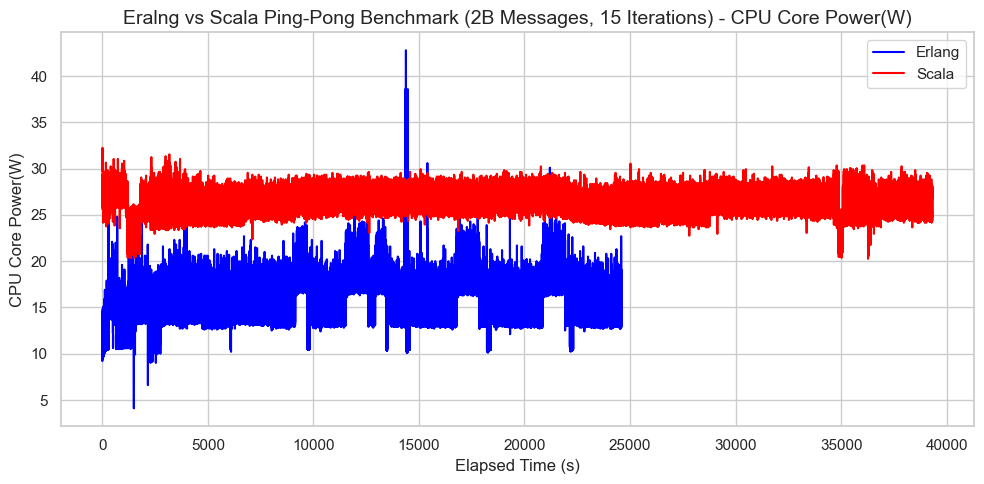

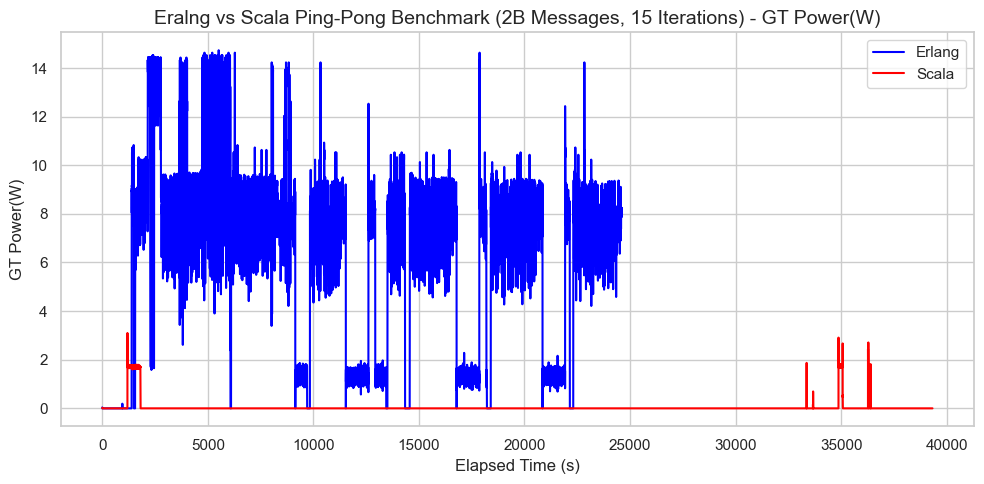

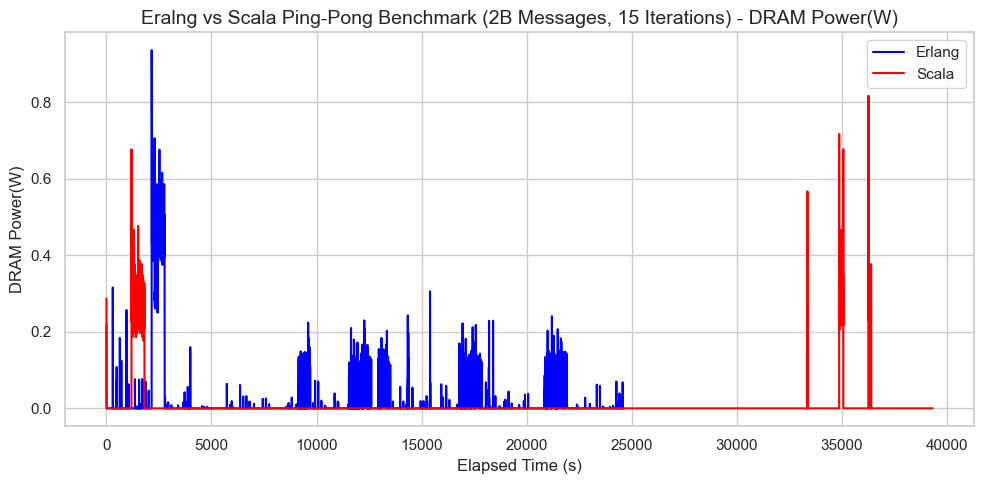

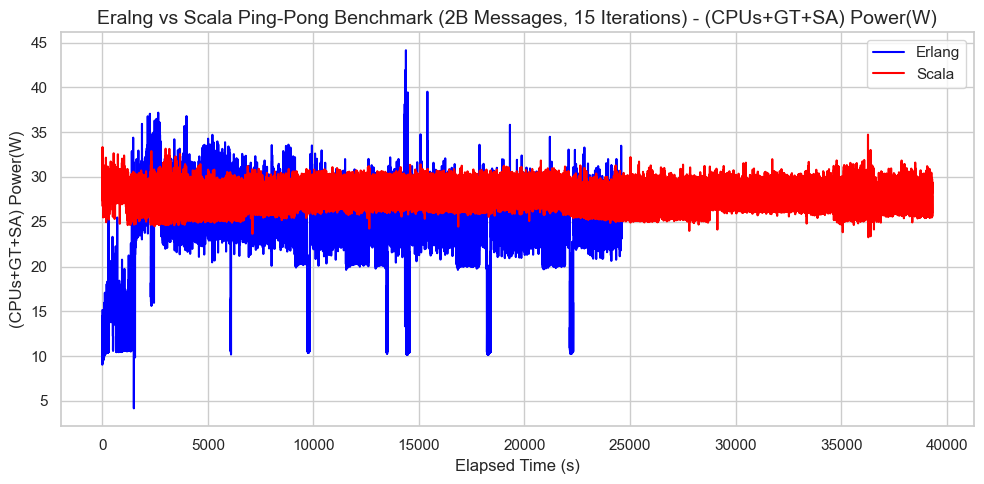

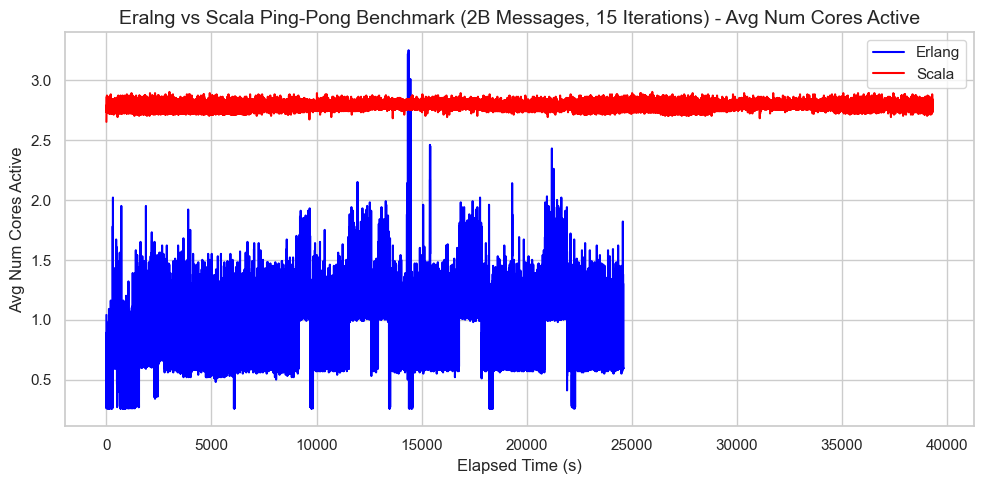

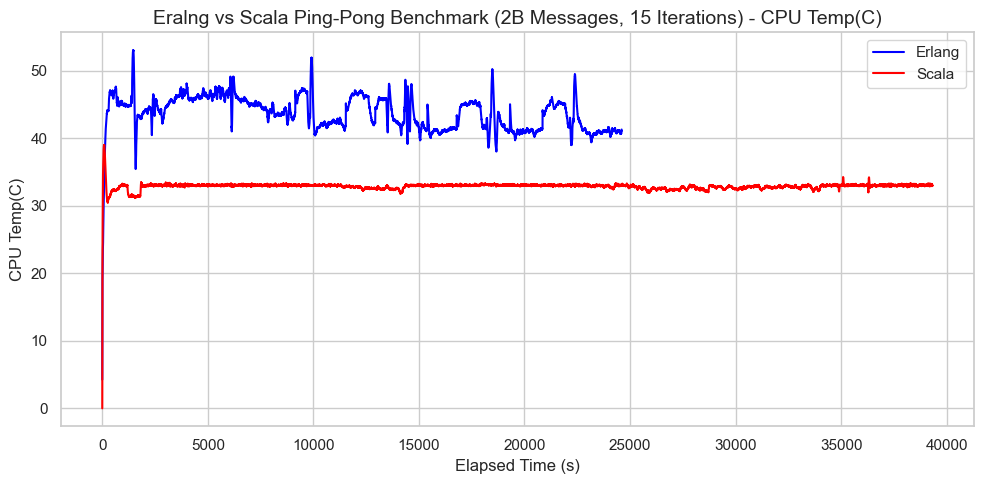

In [34]:
plot_erlang_vs_scala(erlang_bench_data, scala_bench_data, erlang_idle_data, scala_idle_data, f"Eralng vs Scala Ping-Pong Benchmark {title_config_prefix}")


Compute Average Metrics

In [17]:
metrics_columns = ["CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", "(CPUs+GT+SA) Power(W)","CPU Temp(C)", "Avg Num Cores Active"]

In [18]:
# Compute mean idle values for each metric
scala_idle_means = scala_idle_data[metrics_columns].mean()
erlang_idle_means = erlang_idle_data[metrics_columns].mean()

# Subtract the mean idle values from each row in the benchmark data
scala_net_avgs = (scala_bench_data[metrics_columns] - scala_idle_means).mean()
erlang_net_avgs = (erlang_bench_data[metrics_columns] - erlang_idle_means).mean()

print("Net Average Metrics Comparison:\n")
print("Scala Benchmark:")
print(scala_net_avgs, "\n")
print("Erlang Benchmark:")
print(erlang_net_avgs)

Net Average Metrics Comparison:

Scala Benchmark:
CPU Core Power(W)        26.507133
GT Power(W)              -0.041573
DRAM Power(W)            -0.267716
(CPUs+GT+SA) Power(W)    27.856272
CPU Temp(C)              32.869297
Avg Num Cores Active      2.774372
dtype: float64 

Erlang Benchmark:
CPU Core Power(W)        14.920842
GT Power(W)               6.488381
DRAM Power(W)            -0.109957
(CPUs+GT+SA) Power(W)    23.548270
CPU Temp(C)              43.716972
Avg Num Cores Active      0.824081
dtype: float64


Compute Total Energy Consumption

In [19]:
# Calculate total elapsed time
scala_total_time = scala_bench_data["Time Elapsed (ms)"].sum() / 1000
erlang_total_time = erlang_bench_data["Time Elapsed (ms)"].sum() / 1000

# Calculate total elapsed time using timestamps (convert to seconds)
# scala_total_time = (scala_bench_data["Timestamp"].iloc[-1] - scala_bench_data["Timestamp"].iloc[0]).total_seconds()
# erlang_total_time = (erlang_bench_data["Timestamp"].iloc[-1] - erlang_bench_data["Timestamp"].iloc[0]).total_seconds()

# Compute total energy consumption
scala_total_energy = scala_net_avgs["(CPUs+GT+SA) Power(W)"] * scala_total_time
erlang_total_energy = erlang_net_avgs["(CPUs+GT+SA) Power(W)"] * erlang_total_time

# Create a DataFrame for the new row
new_row = pd.DataFrame([{
    "Number of Messages": NMSG,
    "Iterations": ITERATIONS,
    "Erlang Energy Consumption(J)": erlang_total_energy,
    "Scala Energy Consumption(J)": scala_total_energy
}])

# Define CSV file path
csv_filename = os.path.join(parent_dir, "aggregate_energy_results.csv")

# Check if the file exists
if os.path.exists(csv_filename):
    # Load existing data
    existing_data = pd.read_csv(csv_filename)
    
    # Check if the row with the same (Number of Messages, Iterations) already exists
    duplicate_row = existing_data[
        (existing_data["Number of Messages"] == NMSG) &
        (existing_data["Iterations"] == ITERATIONS)
    ]
    
    if not duplicate_row.empty:
        print("Skipping duplicate entry for Number of Messages =", NMSG, "and Iterations =", ITERATIONS)
    else:
        # Append new row
        new_row.to_csv(csv_filename, mode='a', header=False, index=False)
        print("Results appended to", csv_filename)
else:
    # Save with header if file does not exist
    new_row.to_csv(csv_filename, mode='w', header=True, index=False)
    print("File created and results saved to", csv_filename)

# Print the computed values
print("\nTotal Energy Consumption Comparison:")
print("Scala Benchmark:", scala_total_energy,"Joules")
print("Erlang Benchmark:", erlang_total_energy,"Joules")


Results appended to ../../data/ping_pong/aggregate_energy_results.csv

Total Energy Consumption Comparison:
Scala Benchmark: 1095508.810880136 Joules
Erlang Benchmark: 579338.1980670713 Joules
